# Generating random images

In [1]:
%pip install pillow
%pip install matplotlib
%pip install ipympl

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from PIL import Image
from matplotlib import pyplot as plot
from random import SystemRandom
from IPython.display import display

%matplotlib ipympl

In [23]:
image_width: int = 1024
image_height: int = 1024

image_channels: int = 1

generator = SystemRandom()

matrix = list()
max_iterations: int = (image_width*image_height*image_channels)

In [24]:
for y in range(image_height):
    widths: list = list()
    matrix.append(widths)

    for x in range(image_width):
        channels: list = list()
        widths.append(channels)

        for c in range(image_channels):
            value: int = 0
            channels.append(value)

In [25]:
def select_random_width_on_y_axis():
    global generator, image_height
    return generator.randint(0, (image_height - 1))

def select_random_channel_on_x_axis():
    global generator, image_width
    return generator.randint(0, (image_width - 1))

def select_random_channel():
    global generator, image_channels

    if image_channels == 1:
        return 0
    
    return generator.randint(0, image_channels - 1)

In [26]:
def generate_random_set(
    iterations: int
) -> None:
    global matrix

    for iteration in range(iterations):
        position_in_y = select_random_width_on_y_axis()
        position_in_x = select_random_channel_on_x_axis()
        position_of_channel = select_random_channel()

        selection: int = matrix[position_in_y][position_in_x][position_of_channel]

        selection = selection + 1

        matrix[position_in_y][position_in_x][position_of_channel] = selection


In [27]:
generate_random_set(max_iterations * 100)

In [28]:
def get_rgb_pixel_representation_at(
    index_width: int, 
    index_height: int
) -> list:
    global matrix

    pixel = matrix[index_height][index_width][0]

    return (pixel, pixel, pixel)

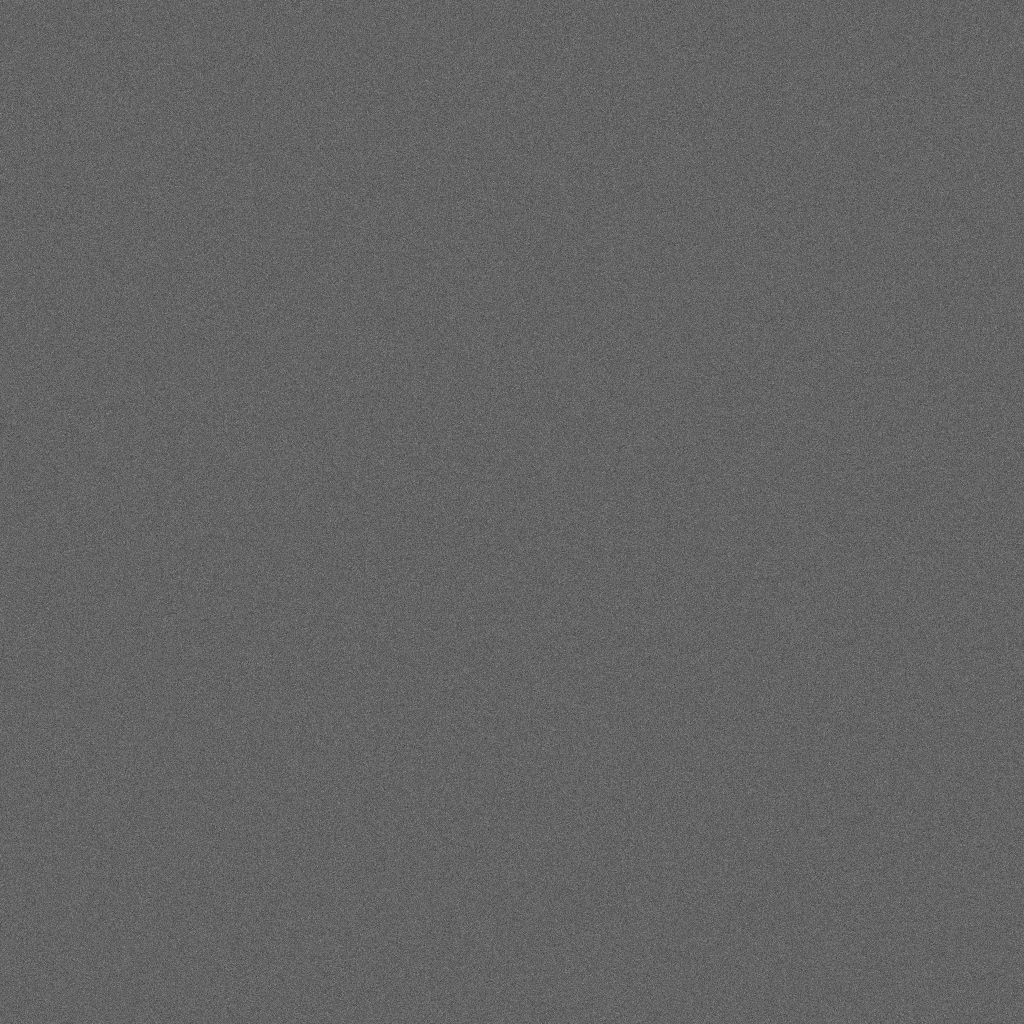

In [29]:
with Image.new('RGB', (image_width, image_height), color="orange") as image:
    pixel_access = image.load()

    for width_index in range(image_width):
        for height_index in range(image_height):
            pixel = pixel_access[
                width_index, 
                height_index
            ]

            pixel = get_rgb_pixel_representation_at(
                width_index, 
                height_index
            )

            pixel_access[width_index, height_index] = pixel

    display(image)